Life Expectancy Prediction Model using Machine Learning

This is a simple machine learning model to predict life expectancy using the WHO dataset taken from kaggle dataset. This model is an supervised learning model. 

1) Importing the libraries

In [1]:
import pandas as pd 
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier as random_forst

In [211]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, accuracy_score

Creating Data Frame

In [212]:
df = pd.read_csv('Life Expectancy Data.csv')


Data Analysis

In [213]:
df.shape

(2938, 22)

In [214]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [215]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [216]:
df.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [217]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


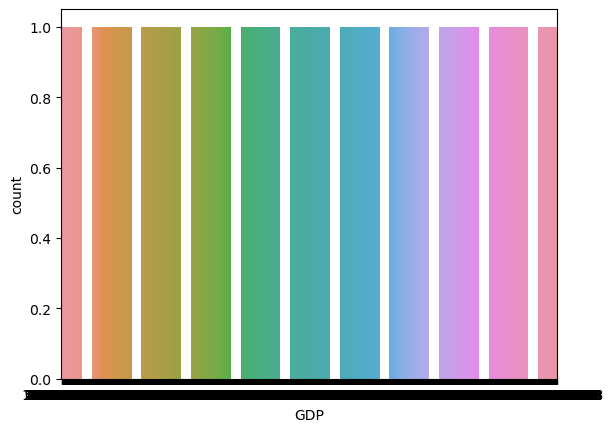

In [218]:
sns.countplot(x="GDP",data=df)
plt.show()

In [219]:
df.isnull().sum(axis=0)

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [220]:
before_drop = df.shape[0]
df = df.dropna()
after_drop = df.shape[0]
print('rows before droping nulls:', before_drop)
print('rows after droping nulls:', after_drop)

rows before droping nulls: 2938
rows after droping nulls: 1649


In [221]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


In [222]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,1649.0,2.007841e+03,4.087711e+00,2000.00000,2005.000000,2.008000e+03,2.011000e+03,2.015000e+03
Life expectancy,1649.0,6.930230e+01,8.796834e+00,44.00000,64.400000,7.170000e+01,7.500000e+01,8.900000e+01
Adult Mortality,1649.0,1.682153e+02,1.253104e+02,1.00000,77.000000,1.480000e+02,2.270000e+02,7.230000e+02
infant deaths,1649.0,3.255306e+01,1.208472e+02,0.00000,1.000000,3.000000e+00,2.200000e+01,1.600000e+03
Alcohol,1649.0,4.533196e+00,4.029189e+00,0.01000,0.810000,3.790000e+00,7.340000e+00,1.787000e+01
percentage expenditure,1649.0,6.989736e+02,1.759229e+03,0.00000,37.438577,1.451023e+02,5.093900e+02,1.896135e+04
Hepatitis B,1649.0,7.921771e+01,2.560466e+01,2.00000,74.000000,8.900000e+01,9.600000e+01,9.900000e+01
Measles,1649.0,2.224494e+03,1.008580e+04,0.00000,0.000000,1.500000e+01,3.730000e+02,1.314410e+05
BMI,1649.0,3.812862e+01,1.975425e+01,2.00000,19.500000,4.370000e+01,5.580000e+01,7.710000e+01
under-five deaths,1649.0,4.422013e+01,1.628980e+02,0.00000,1.000000,4.000000e+00,2.900000e+01,2.100000e+03


/tmp/ipykernel_13799/2728902234.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='RdYlGn')


<AxesSubplot:>

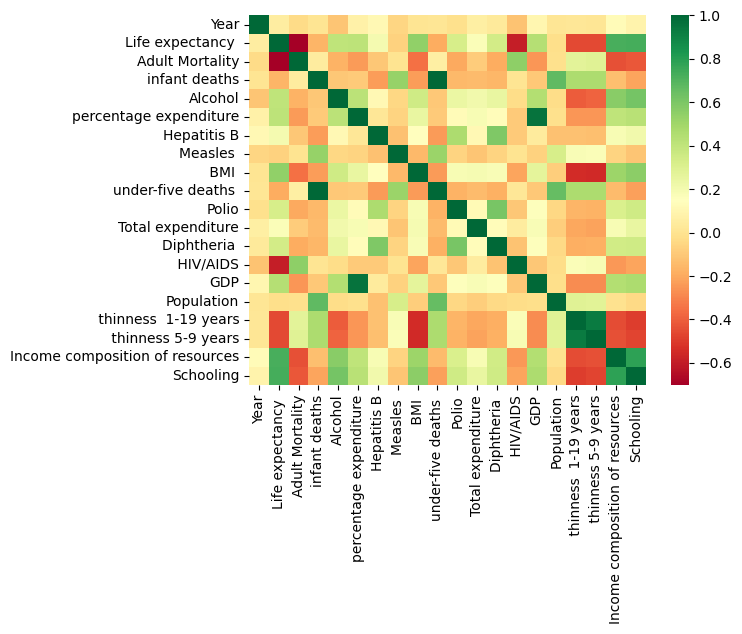

In [223]:
sns.heatmap(df.corr(), cmap='RdYlGn')

In [224]:

y = df['Life expectancy '].values
X_gdp = df['GDP'].values


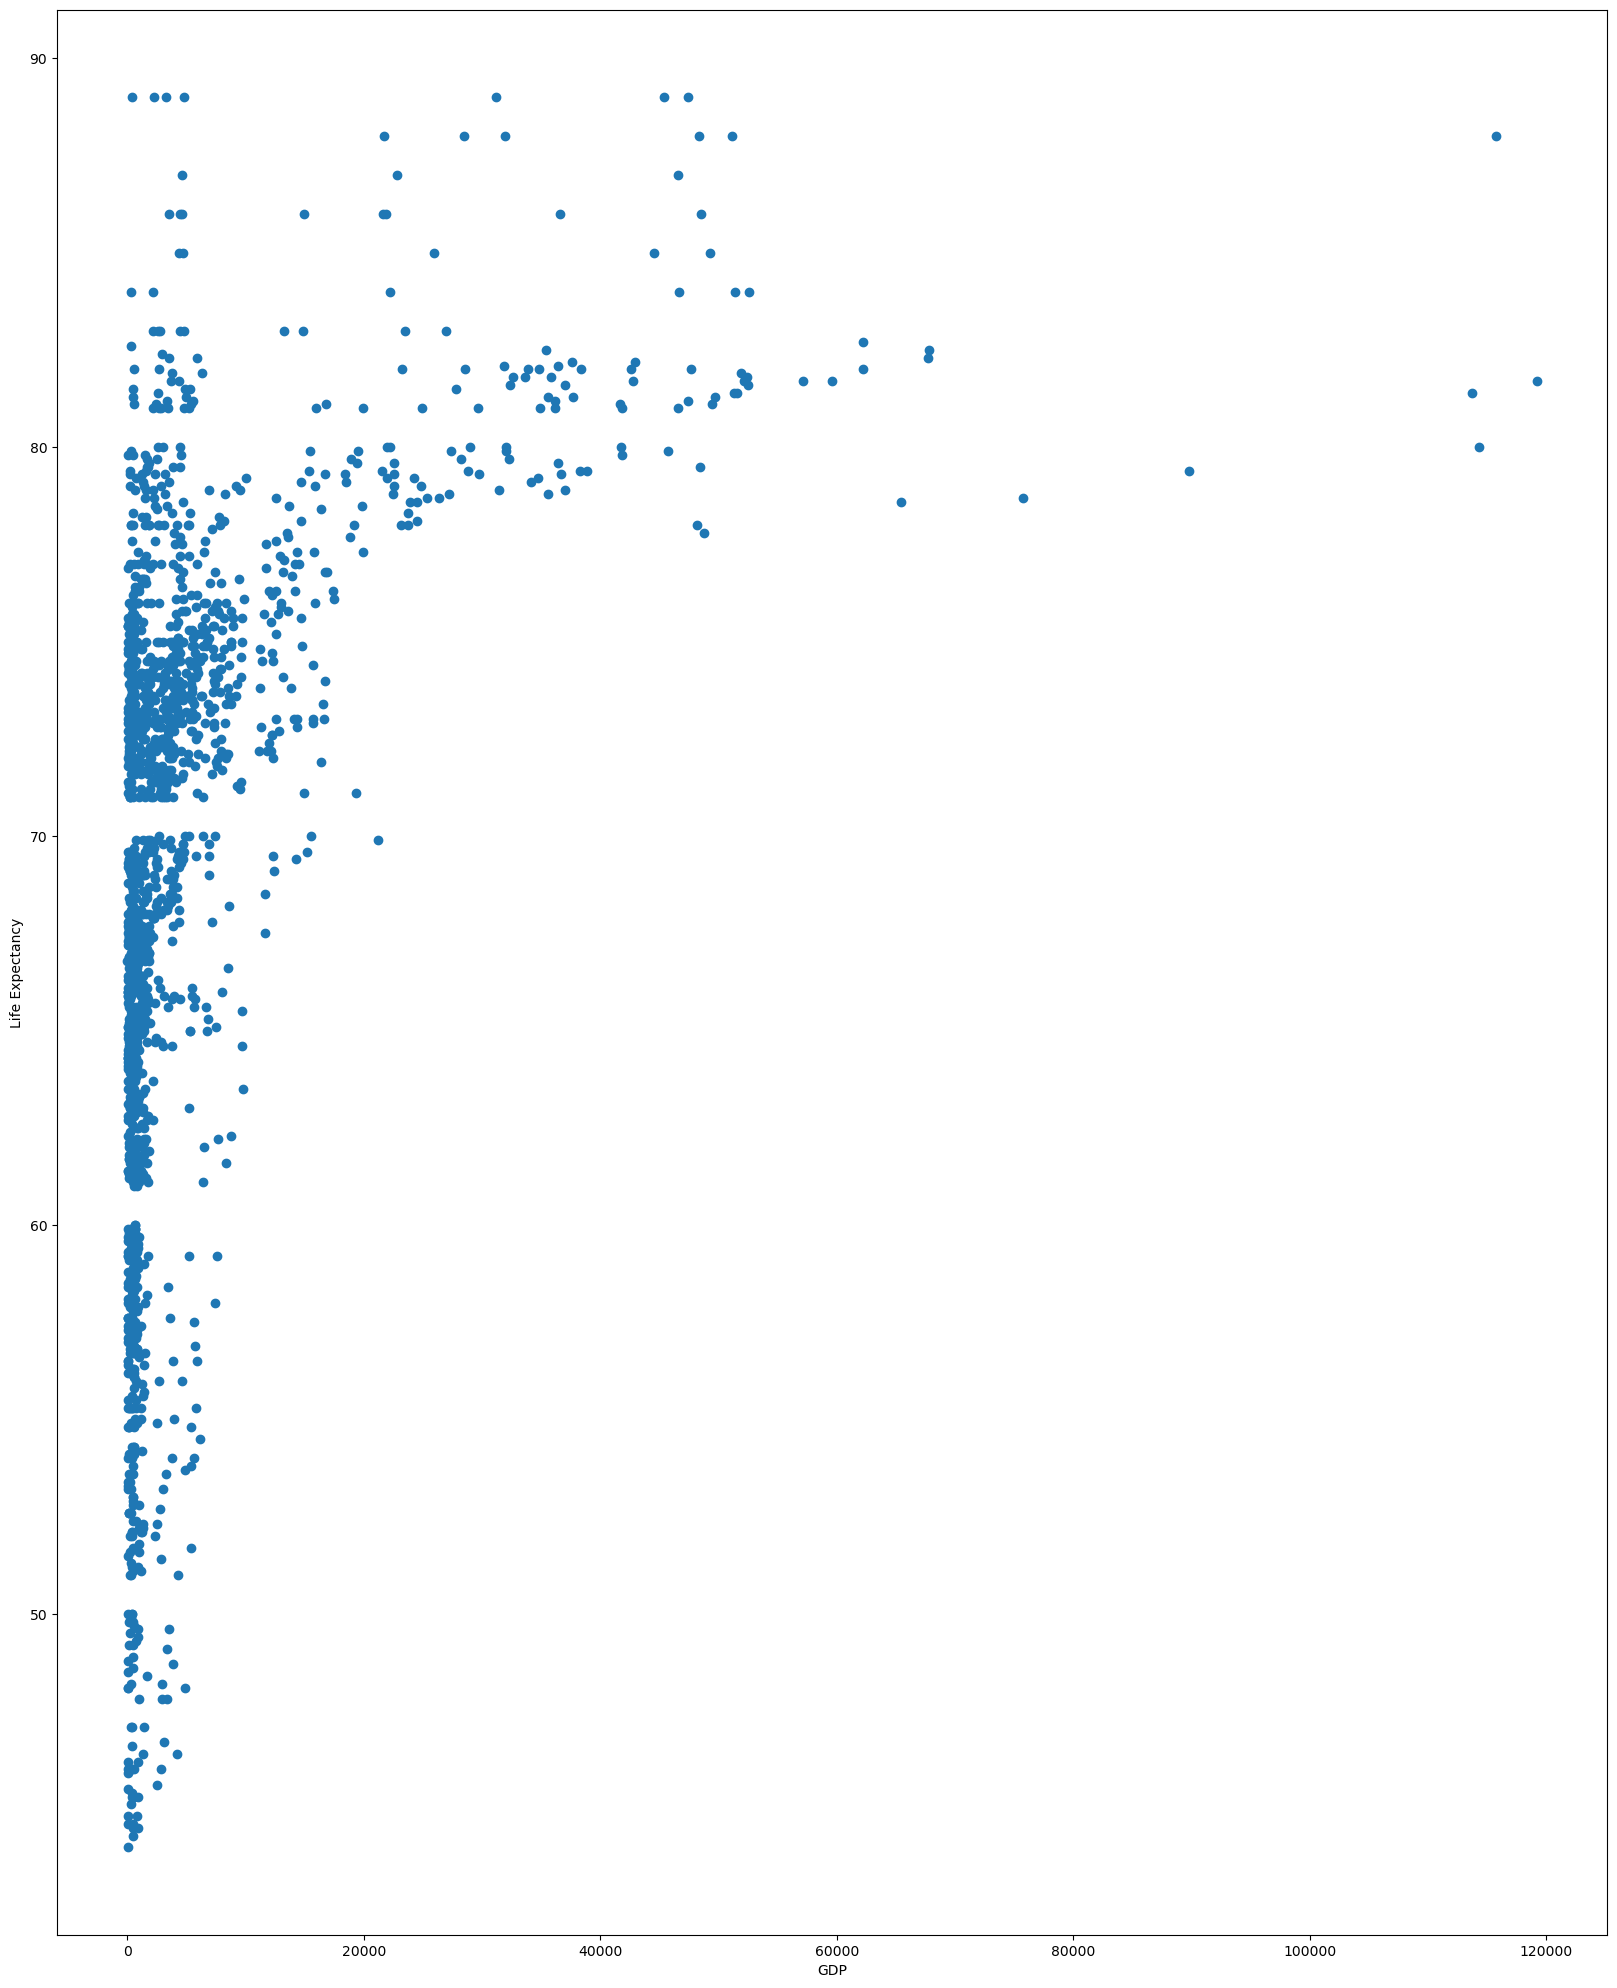

In [225]:
plt.figure(figsize=(20,25))
plt.scatter(X_gdp, y)

plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.show()

In [226]:
lnreg = LinearRegression()

In [227]:
prediction_space = np.linspace(min(X_gdp), max(X_gdp)).reshape(-1,1)

In [228]:
print(y)

[65.  59.9 59.9 ... 44.8 45.3 46. ]


In [229]:
print(X_gdp)

[584.25921   612.696514  631.744976  ...  57.34834   548.587312
 547.3588785]


In [230]:
X_gdp=np.array(X_gdp).reshape(-1,1)

In [231]:
y=np.array(y).reshape(-1,1)

In [232]:
lnreg.fit(X_gdp,y)

LinearRegression()

In [233]:
y_pred = lnreg.predict(prediction_space)

In [234]:
print(lnreg.score(prediction_space, y_pred))

1.0


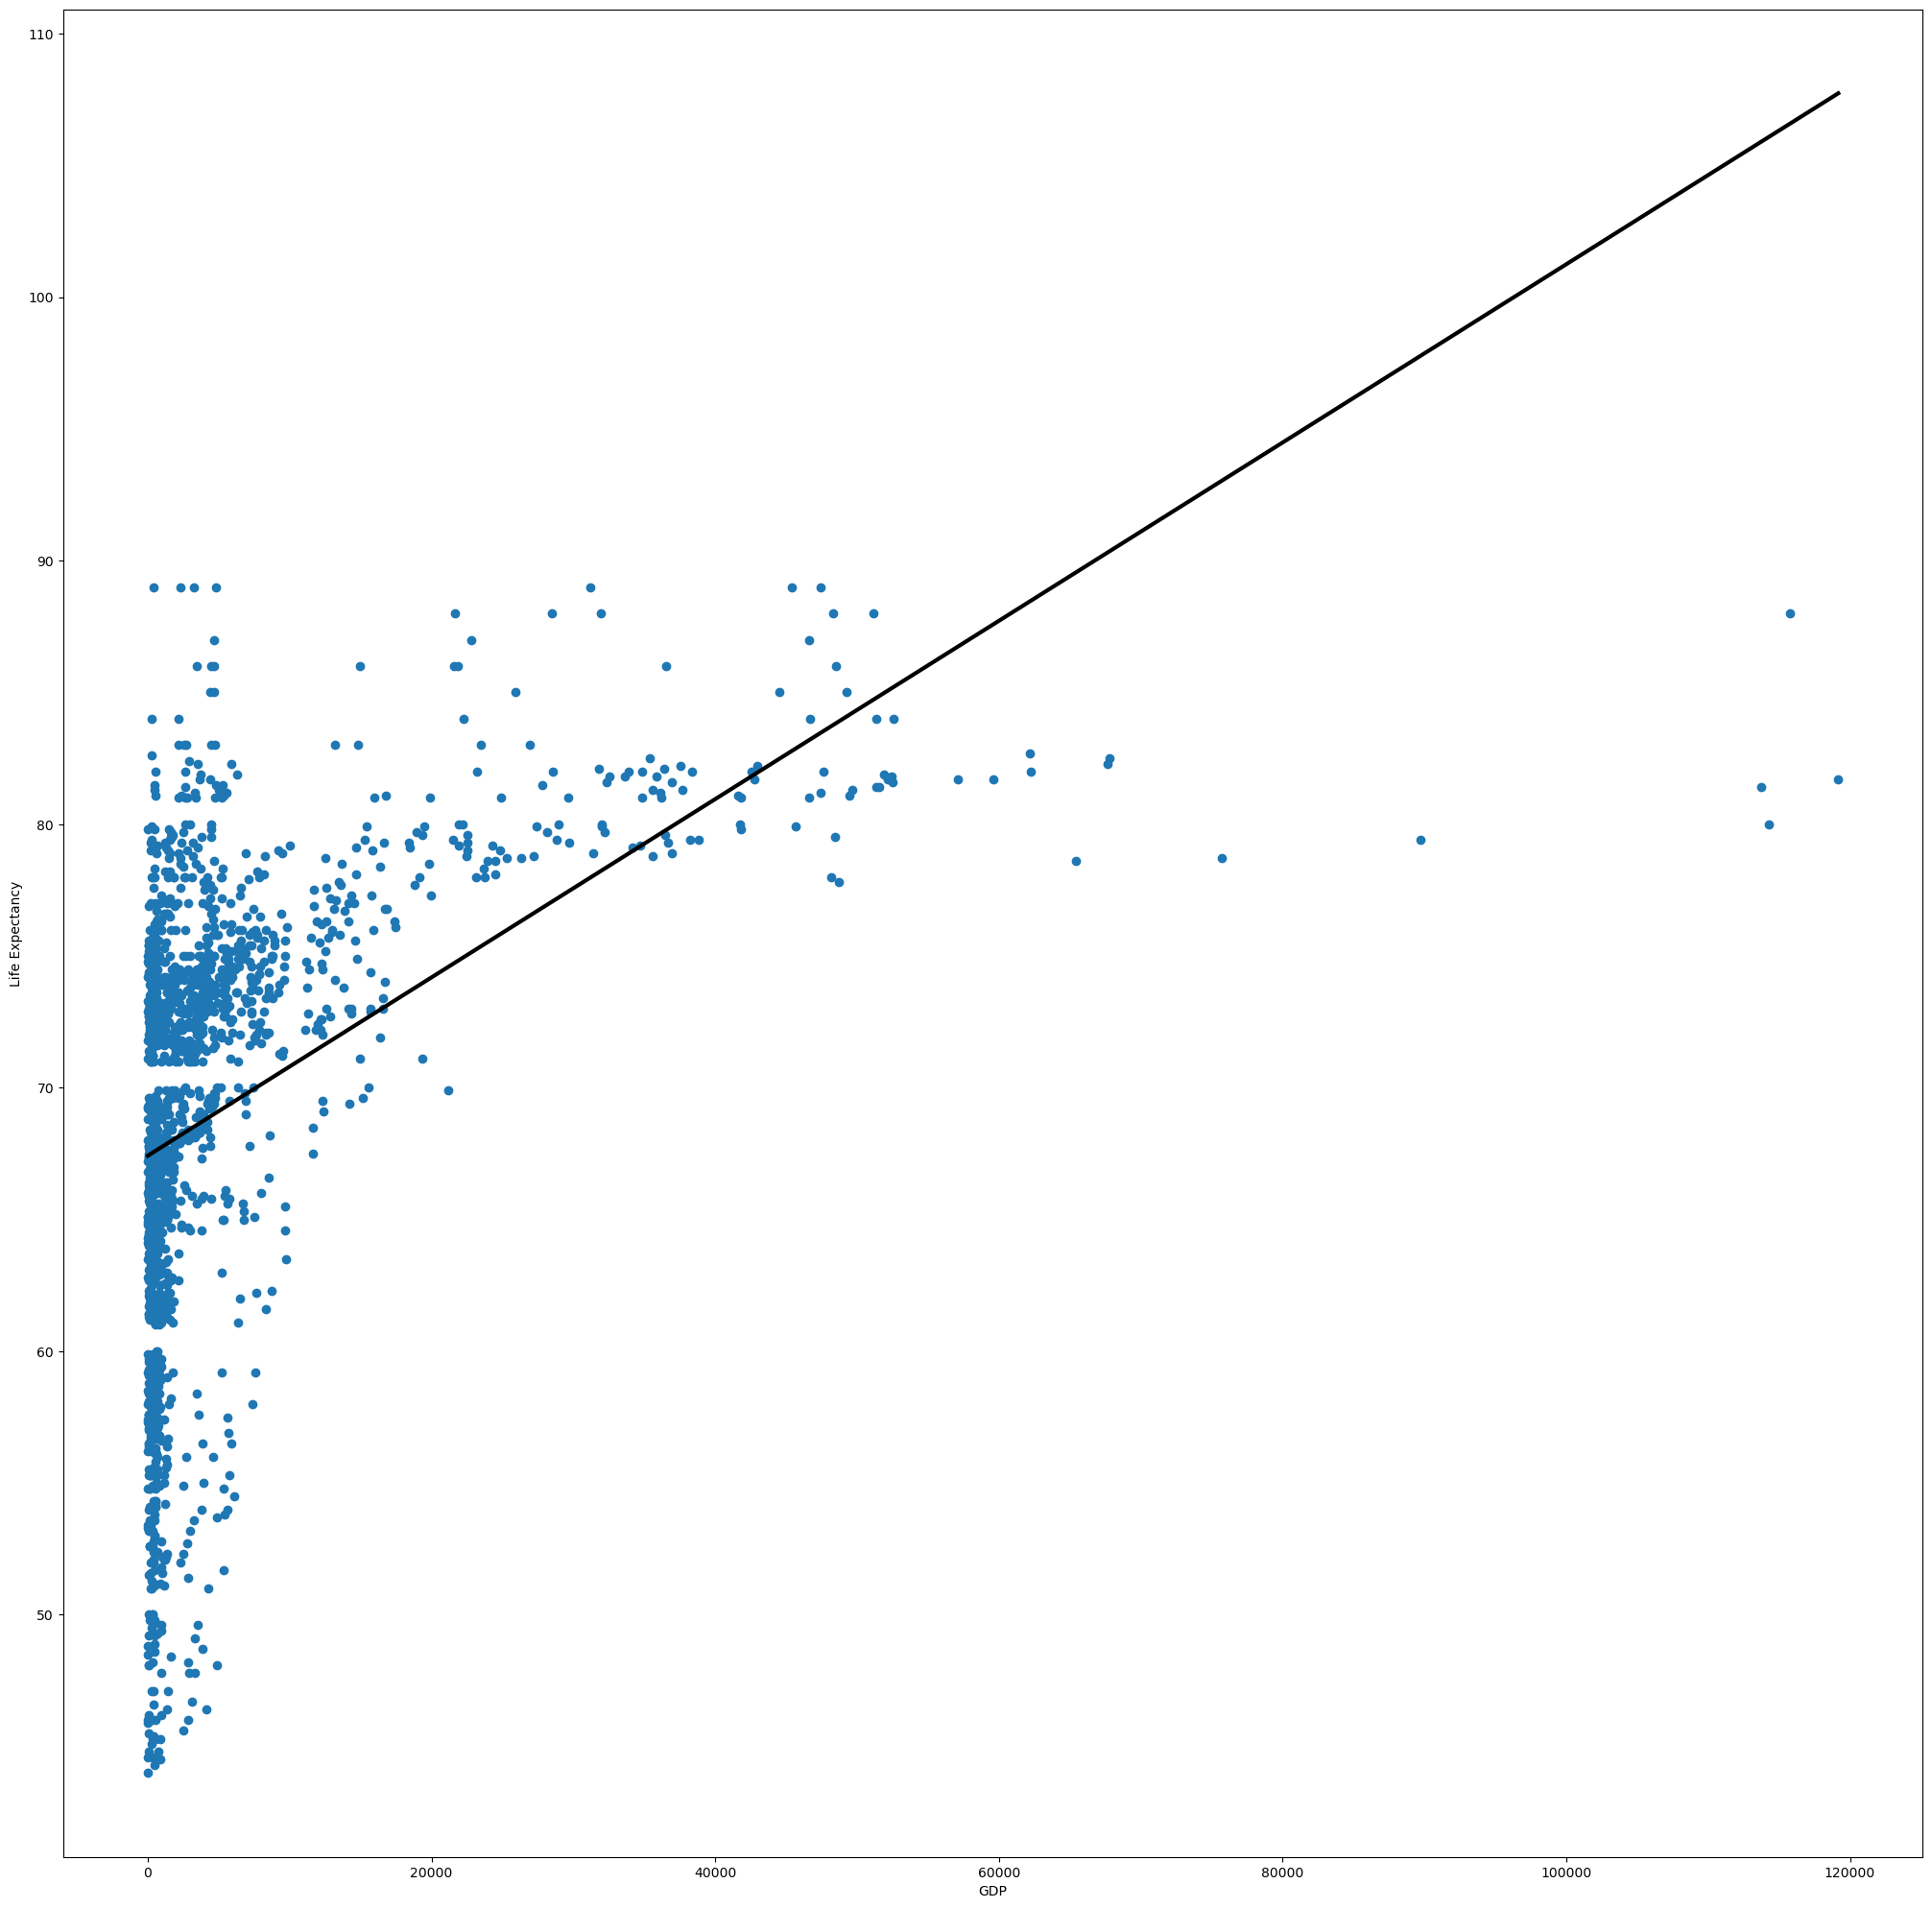

In [235]:
plt.figure(figsize=(25,25))
plt.scatter(X_gdp, y)
plt.plot(prediction_space, y_pred, color='black', linewidth=3)

plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.show()

In [236]:
df = df.drop(['Country','Year','Status'], axis=1)

In [237]:
df.describe()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


In [238]:
df.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [239]:
df.tail()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,44.3,723.0,27,4.36,0.0,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,44.5,715.0,26,4.06,0.0,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,44.8,73.0,25,4.43,0.0,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,45.3,686.0,25,1.72,0.0,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,46.0,665.0,24,1.68,0.0,79.0,1483,25.5,39,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [240]:
y = df['Life expectancy '].values
X = df.drop(['Life expectancy '], axis=1).values

In [241]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [242]:
ln_reg = LinearRegression()

In [243]:
ln_reg.fit(X_train, y_train)

LinearRegression()

In [244]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Life expectancy,1649.0,6.930230e+01,8.796834e+00,44.00000,64.400000,7.170000e+01,7.500000e+01,8.900000e+01
Adult Mortality,1649.0,1.682153e+02,1.253104e+02,1.00000,77.000000,1.480000e+02,2.270000e+02,7.230000e+02
infant deaths,1649.0,3.255306e+01,1.208472e+02,0.00000,1.000000,3.000000e+00,2.200000e+01,1.600000e+03
Alcohol,1649.0,4.533196e+00,4.029189e+00,0.01000,0.810000,3.790000e+00,7.340000e+00,1.787000e+01
percentage expenditure,1649.0,6.989736e+02,1.759229e+03,0.00000,37.438577,1.451023e+02,5.093900e+02,1.896135e+04
Hepatitis B,1649.0,7.921771e+01,2.560466e+01,2.00000,74.000000,8.900000e+01,9.600000e+01,9.900000e+01
Measles,1649.0,2.224494e+03,1.008580e+04,0.00000,0.000000,1.500000e+01,3.730000e+02,1.314410e+05
BMI,1649.0,3.812862e+01,1.975425e+01,2.00000,19.500000,4.370000e+01,5.580000e+01,7.710000e+01
under-five deaths,1649.0,4.422013e+01,1.628980e+02,0.00000,1.000000,4.000000e+00,2.900000e+01,2.100000e+03
Polio,1649.0,8.356458e+01,2.245056e+01,3.00000,81.000000,9.300000e+01,9.700000e+01,9.900000e+01


In [245]:
y = df['Life expectancy '].values
X_bmi = df['GDP'].values

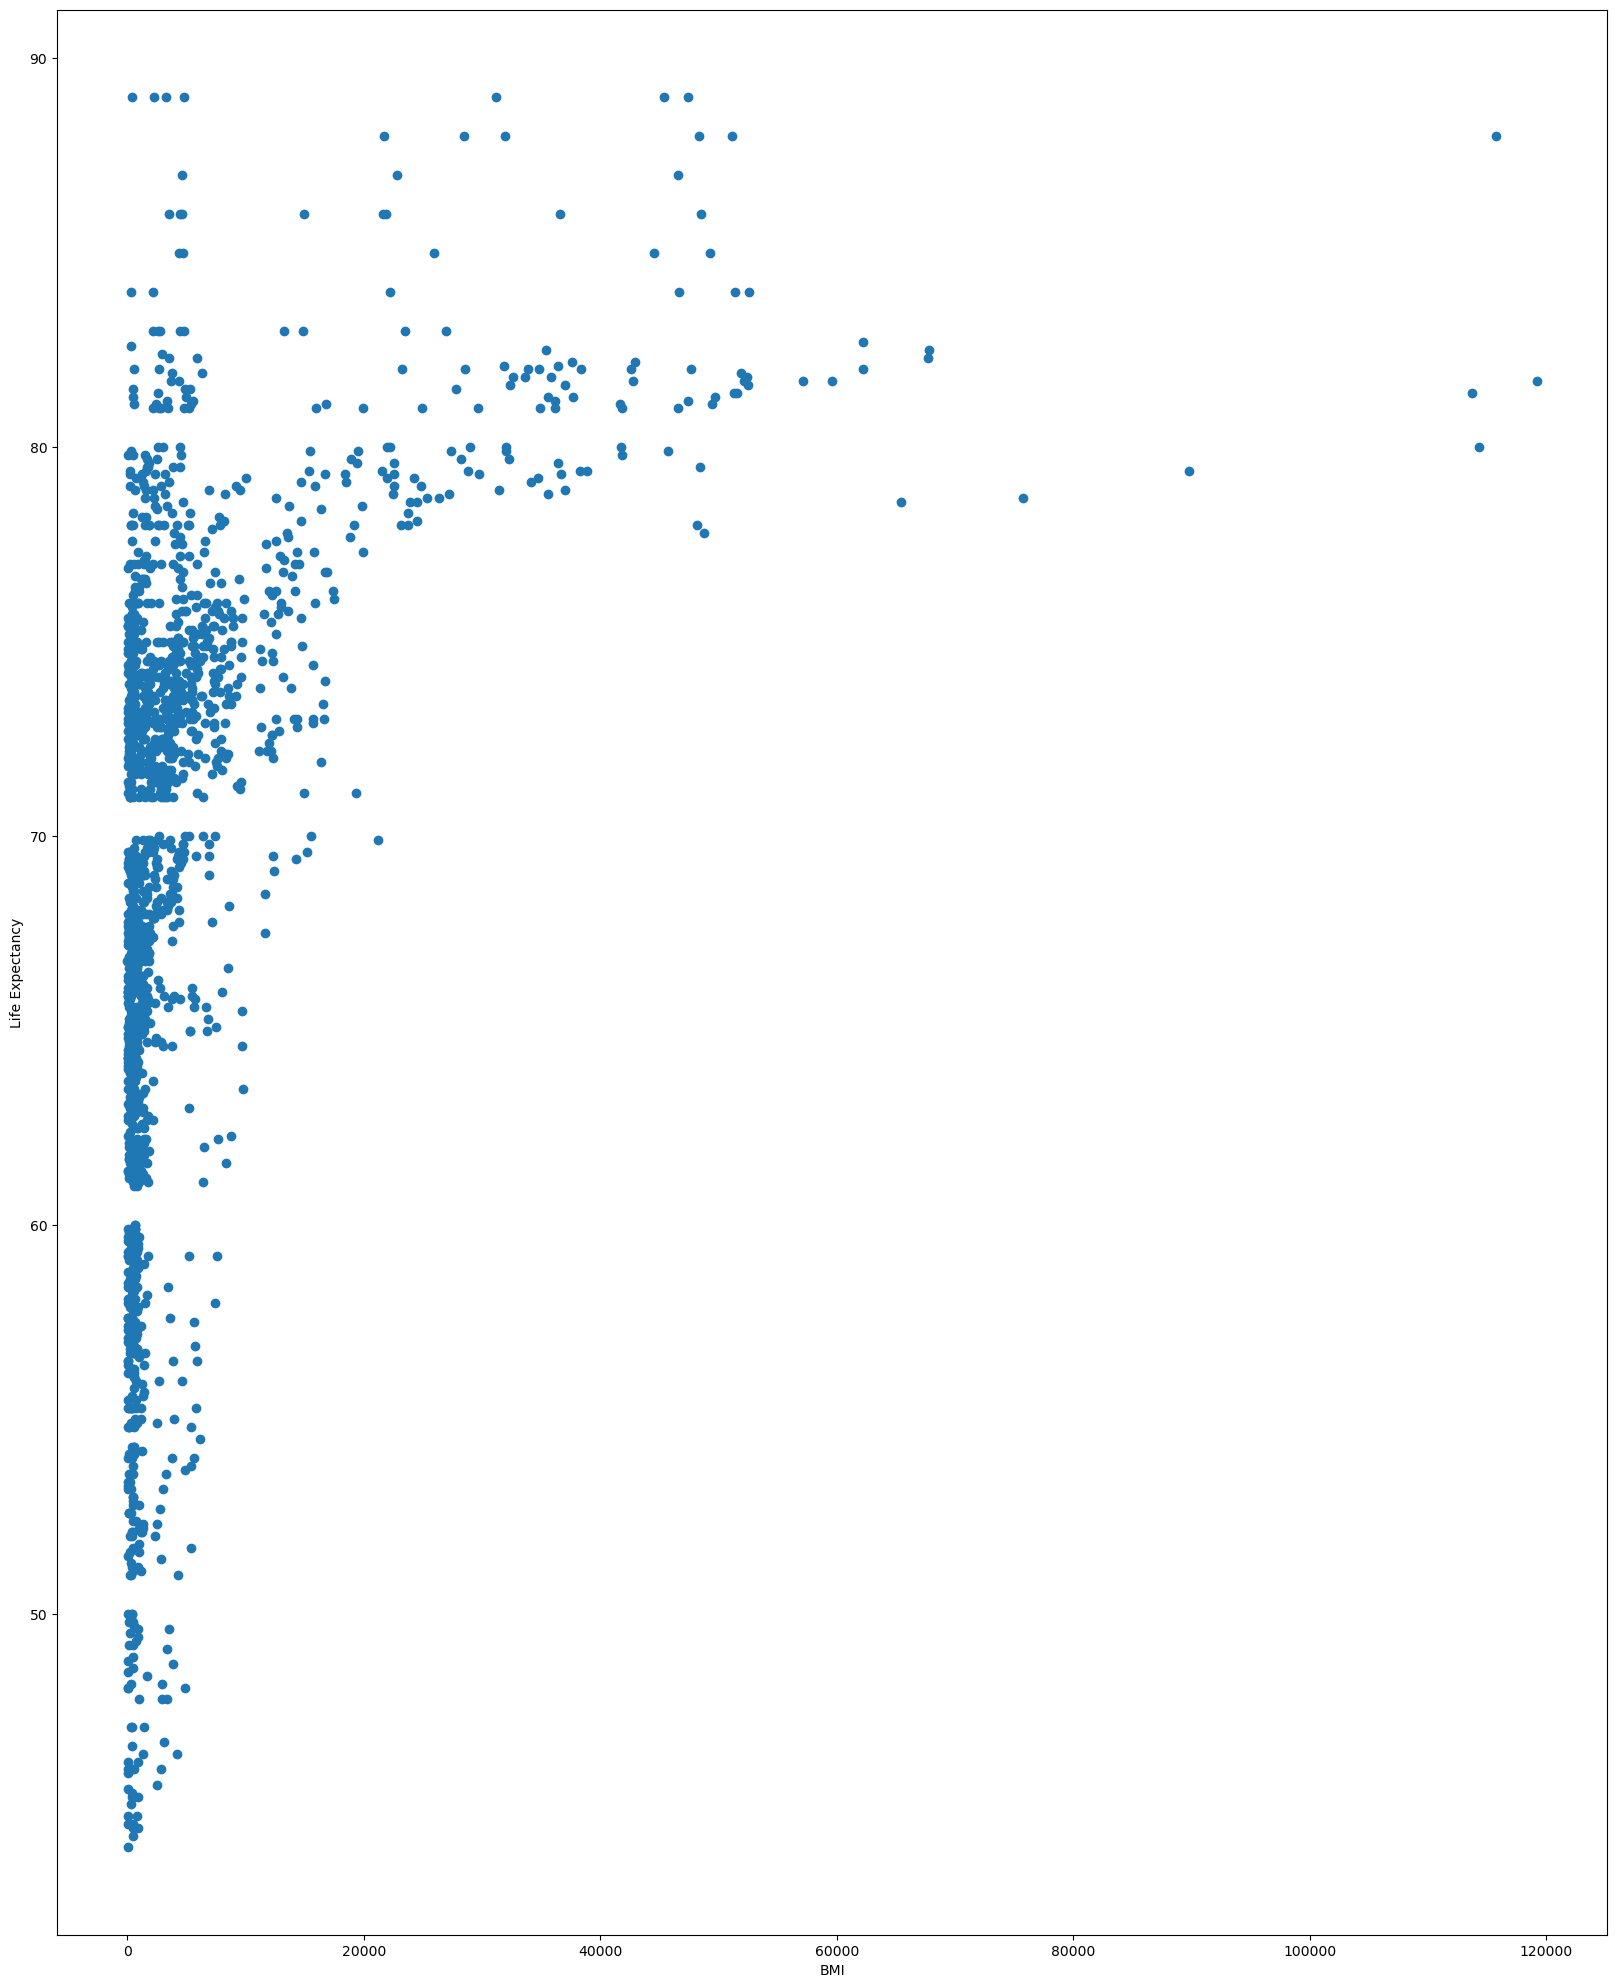

In [246]:
plt.figure(figsize=(20,25))
plt.scatter(X_bmi, y)

plt.xlabel('BMI')
plt.ylabel('Life Expectancy')
plt.show()

In [247]:
y = df['Life expectancy '].values
X_all = df.drop(['Life expectancy '], axis=1).values

In [248]:
X_t, X_te, y_t, y_te = train_test_split(X_all, y, test_size=0.3, random_state=42)


In [249]:
ln_reg_all = LinearRegression()

In [250]:
ln_reg_all.fit(X_t, y_t)



LinearRegression()

In [251]:
y_pred = ln_reg_temp.predict(X_test)

NameError: name 'ln_reg_temp' is not defined

In [ ]:
print('R^2: {}'.format(ln_reg_all.score(X_test, y_test)))
print('rmse: {}'.format(np.sqrt(mean_squared_error(y_pred, y_test))))

In [ ]:
y = df['Life expectancy '].values
X_all = df.drop(['Life expectancy '], axis=1).values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.3, random_state=42)

In [ ]:
cv_reg = LinearRegression()

In [ ]:
cv_list = np.array([3,4,5,6,7,8,9])

for cv in cv_list:
    cv_scores = cross_val_score(cv_reg, X_all, y, cv=cv)
    print(cv_scores)
    print('Average ' + str(cv) + '-Fold CV Score is: {}'.format(np.mean(cv_scores)))
    print()

In [ ]:
y = df['Life expectancy '].values
X_all = df.drop(['Life expectancy '], axis=1).values

In [ ]:
reg_lasso = Lasso(alpha=0.4, normalize=True)

In [ ]:
reg_lasso.fit(X_all, y)

In [ ]:
lasso_coef = reg_lasso.fit(X_all, y).coef_
print(lasso_coef)

In [ ]:
df_columns = ['Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']

In [ ]:
plt.figure(figsize=(19,8))
plt.plot(range(len(df_columns)), lasso_coef)

plt.xticks(range(len(df_columns)), df_columns, rotation=60)
plt.margins(0.1)
plt.show()

In [ ]:
for col in df.columns:
    print(col)

In [ ]:

y = df[['Life expectancy ']].values
X_am = df[['Adult Mortality']].values

In [ ]:
plt.figure(figsize=(20,25))
plt.scatter(X_am, y)

plt.xlabel('Adult Mortality')
plt.ylabel('Life Expectancy')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
X_am.reshape(-1,1)
y.reshape(-1,1)

In [ ]:
model = LinearRegression()
model.fit(X_am,y)

In [ ]:
model.fit(X_am,y)

In [ ]:
plt.scatter(X_am,y)
plt.xlabel("Adult Mortality")
plt.ylabel("Life Expectancy")

In [ ]:
print(X_am)

In [ ]:
x_test = np.array([[101]])
y_pred = model.predict(x_test)
print(y_pred)

In [ ]:

y = df[['Life expectancy ']].values
X_bmi = df[[' BMI ']].values

In [ ]:
plt.figure(figsize=(10 ,10))
plt.scatter(X_bmi, y)
plt.xlabel('BMI')
plt.ylabel('Life Expectancy')
plt.show()

In [ ]:
X_bmi.reshape(-1,1)
y.reshape(-1,1)

In [ ]:
model1 = LinearRegression()
model1.fit(X_bmi,y)

In [ ]:
print(X_bmi)

In [ ]:
model1.fit(X_bmi,y)

In [ ]:
plt.scatter(X_bmi, y)
plt.xlabel("BMI")
plt.ylabel("Life Expectancy")
plt.plot(X_bmi, model1.predict(X_bmi), color='red', linewidth=1)
plt.show()

In [ ]:
x_test = np.array([[22]])
y_pred = model1.predict(x_test)
print(y_pred)


In [ ]:
x_test_0 = np.array([[101]])
x_test_1 = np.array([[22]])
y_pred=model.predict((x_test_0)+model1.predict(x_test_1)/2)
print(y_pred)

In [ ]:
adult=int(input("Enter adult mortality rate "))
bmi=int(input("Enter BMI "))
x_test_0 = np.array([[adult]])
x_test_1 = np.array([[bmi]])
y_pred=model.predict((x_test_0)+model1.predict(x_test_1)/2)
print(y_pred)            

In [ ]:

y = df[['Life expectancy ']].values
X_alcohol= df[['Alcohol']].values

In [ ]:
print(X_alcohol)

In [ ]:
plt.figure(figsize=(20, 25))
plt.scatter(X_alcohol, y)
plt.xlabel('Alcohol;')
plt.ylabel('Life Expectancy')
plt.show()

In [ ]:

plt.scatter(X_alcohol, y)
plt.xlabel("Alcohol ")
plt.ylabel("Life Expectancy")
plt.plot(X_bmi, model.predict(X_alcohol), color='red', linewidth=1)
plt.show()

In [ ]:
X_alcohol.reshape(-1,1)
y.reshape(-1,1)

In [ ]:
model2 = LinearRegression()
model2.fit(X_alcohol,y)

In [ ]:
model2.fit(X_alcohol,y)

In [ ]:
plt.scatter(X_alcohol, y)
plt.xlabel("Alcohol")
plt.ylabel("Life Expectancy")

In [252]:
x_test = np.array([[7.5]])
y_pred = model2.predict(x_test)
print(y_pred)


[[70.33439981]]


In [253]:
for col in df.columns:
    print(col)
    

Life expectancy 
Adult Mortality
infant deaths
Alcohol
percentage expenditure
Hepatitis B
Measles 
 BMI 
under-five deaths 
Polio
Total expenditure
Diphtheria 
 HIV/AIDS
GDP
Population
 thinness  1-19 years
 thinness 5-9 years
Income composition of resources
Schooling


In [254]:

y = df[['Life expectancy ']].values
X_Totalexpenditure= df[['Total expenditure']].values

In [255]:
print(X_Totalexpenditure)

[[8.16]
 [8.18]
 [8.13]
 ...
 [6.53]
 [6.16]
 [7.1 ]]


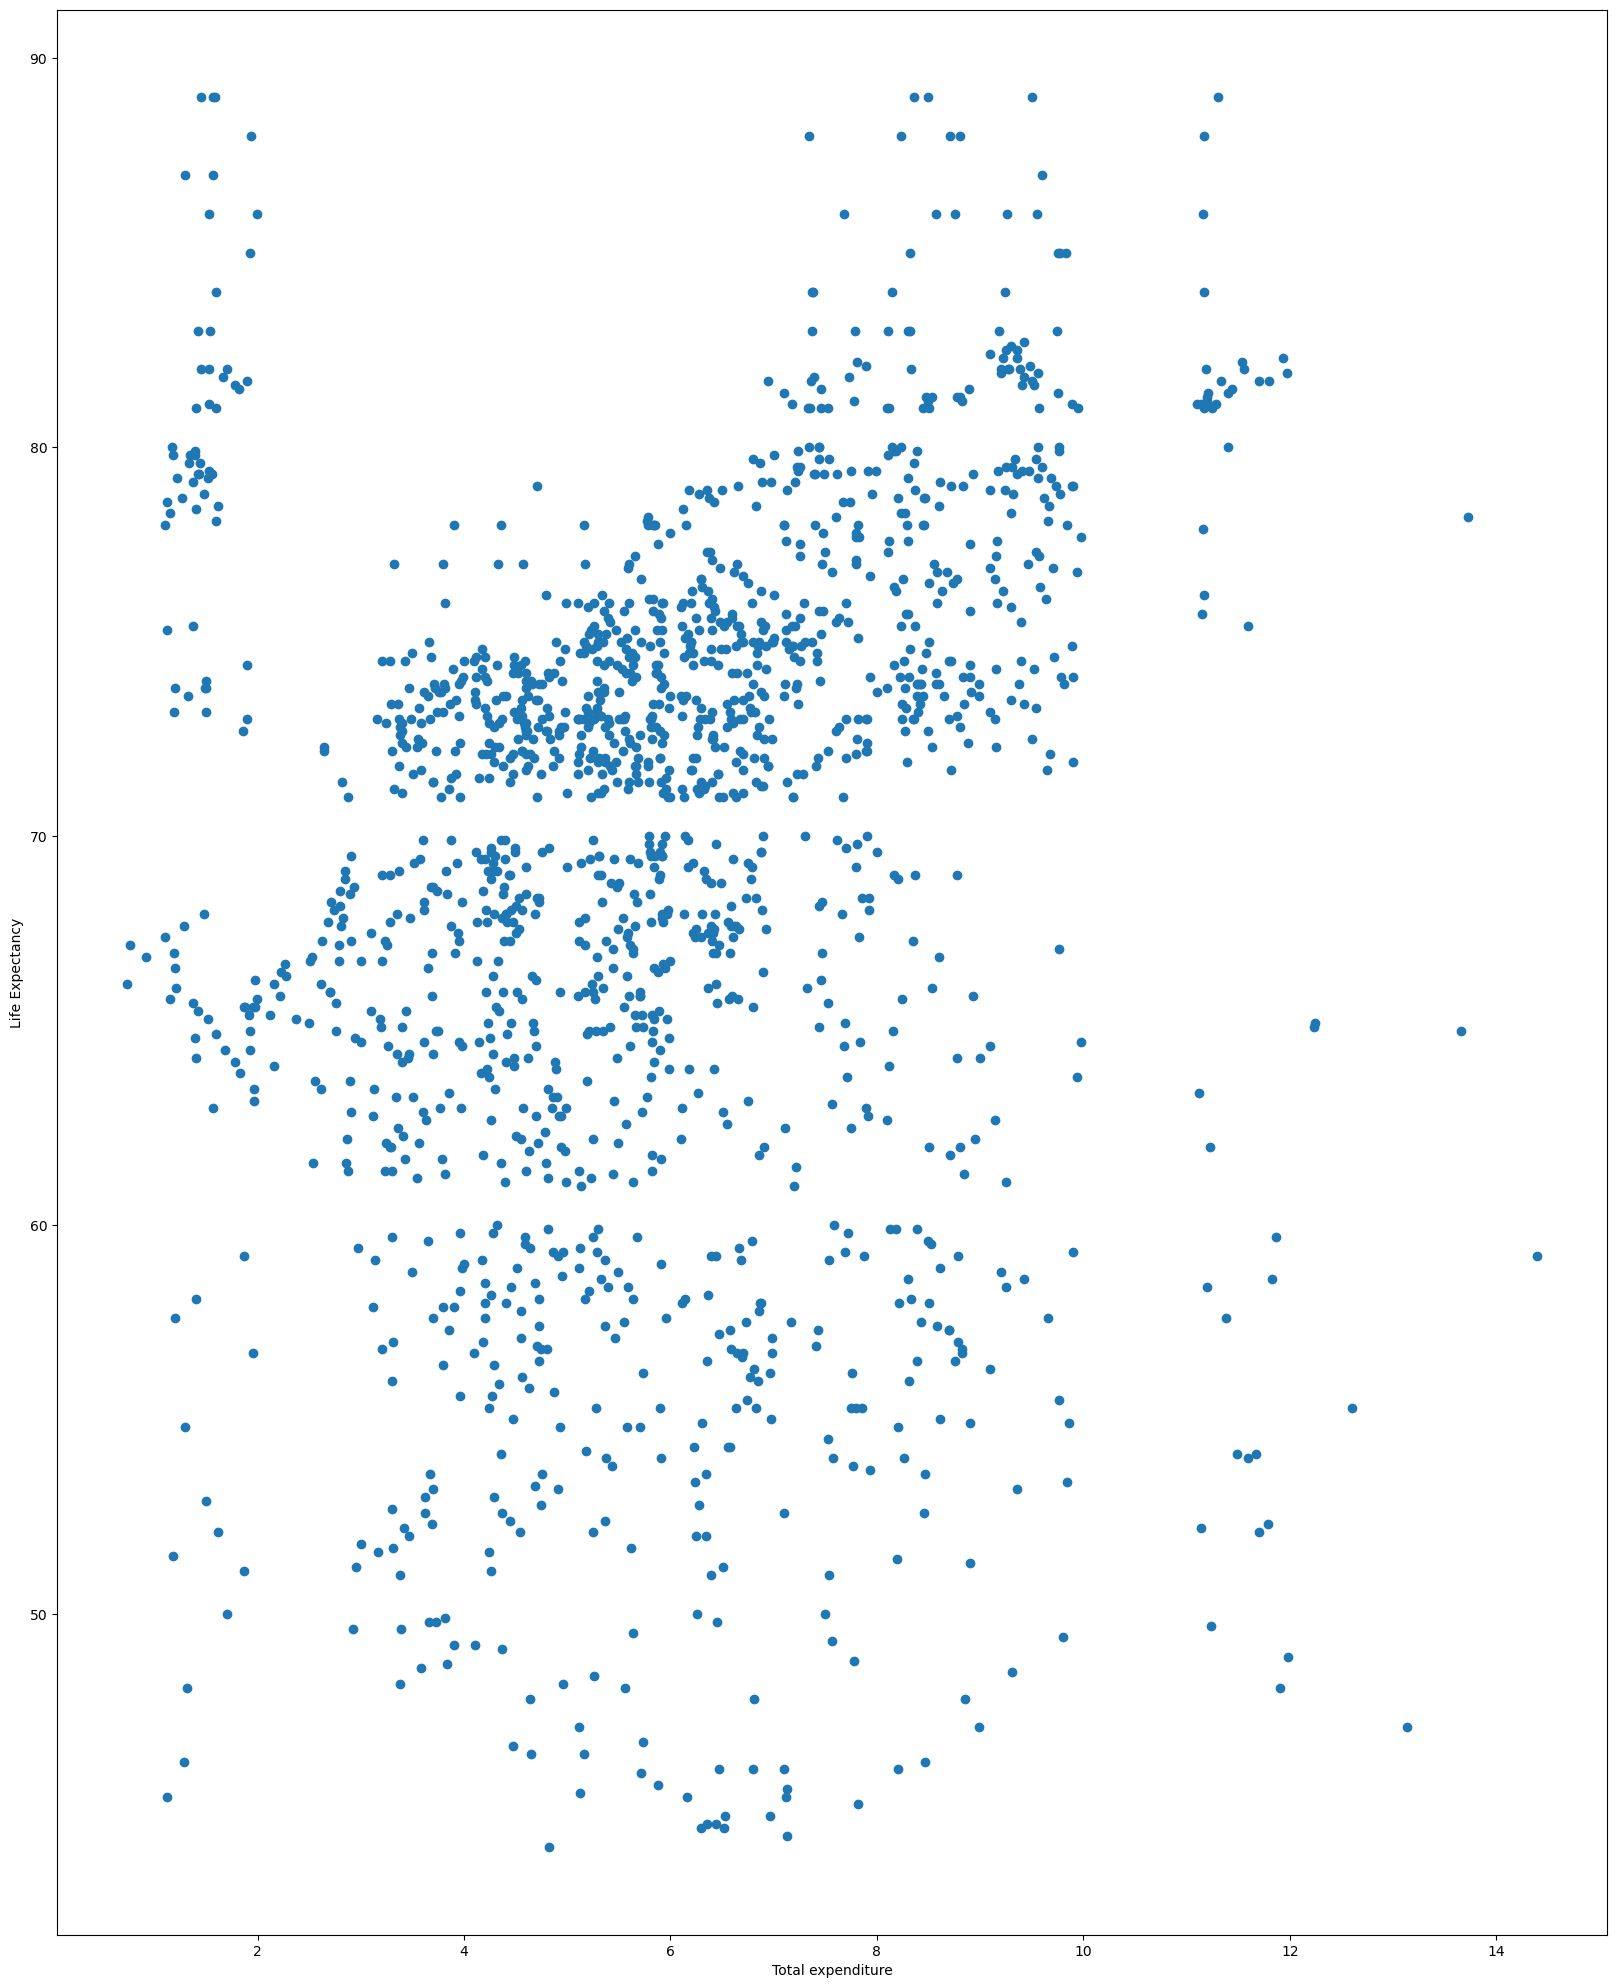

In [256]:
plt.figure(figsize=(20, 25))
plt.scatter(X_Totalexpenditure, y)
plt.xlabel('Total expenditure')
plt.ylabel('Life Expectancy')
plt.show()

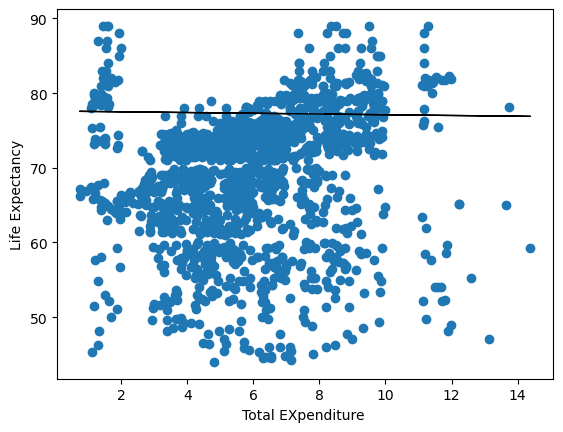

In [257]:

plt.scatter(X_Totalexpenditure, y)
plt.xlabel("Total EXpenditure ")
plt.ylabel("Life Expectancy")
plt.plot(X_Totalexpenditure, model.predict(X_Totalexpenditure), color='black', linewidth=1)
plt.show()

In [258]:
X_Totalexpenditure.reshape(-1,1)
y.reshape(-1,1)

array([[65. ],
       [59.9],
       [59.9],
       ...,
       [44.8],
       [45.3],
       [46. ]])

In [259]:
model3 = LinearRegression()
model3.fit(X_Totalexpenditure,y)

LinearRegression()

In [260]:
model3.fit(X_Totalexpenditure,y)

LinearRegression()

Text(0, 0.5, 'Life Expectancy')

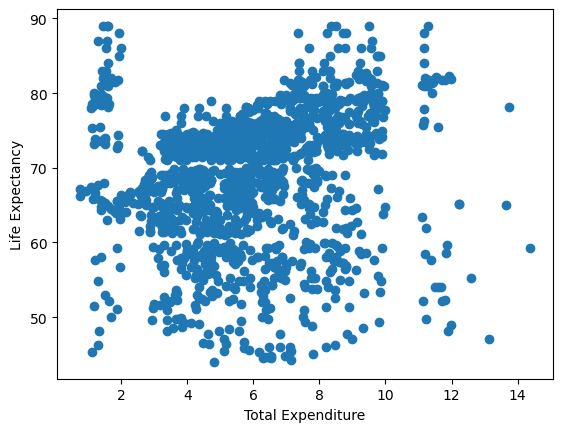

In [261]:
plt.scatter(X_Totalexpenditure, y)
plt.xlabel("Total Expenditure")
plt.ylabel("Life Expectancy")

In [262]:
x_test = np.array([[72]])
y_pred = model3.predict(x_test)
print(y_pred)

[[113.44768343]]


In [263]:
for col in df.columns:
    print(col)

Life expectancy 
Adult Mortality
infant deaths
Alcohol
percentage expenditure
Hepatitis B
Measles 
 BMI 
under-five deaths 
Polio
Total expenditure
Diphtheria 
 HIV/AIDS
GDP
Population
 thinness  1-19 years
 thinness 5-9 years
Income composition of resources
Schooling


In [264]:
modelf=LinearRegression()

In [265]:
y= df[['Life expectancy ']].values
x= (df[['Total expenditure']].values+ df[['Alcohol']].values+ df[[' BMI ']].values+ df[['Adult Mortality']].values)

In [266]:
y = df[['Life expectancy ']].values
x = (df[['Total expenditure']].values+ df[['Alcohol']].values+ df[[' BMI ']].values+ df[['Adult Mortality']].values)

modelf.fit(x,y)

LinearRegression()

In [274]:
adult=int(input("Enter adult mortality rate "))
bmi=int(input("Enter BMI "))
alcohol=int(input("Enter average alcohol consumption"))
total_expenditure=int(input("Enter average total expenditure"))
x_test_0 = np.array([[adult]])
x_test_1 = np.array([[bmi]])
x_test_2 = np.array([[alcohol]])
x_test_3 = np.array([[total_expenditure]])
y_pred=modelf.predict(((x_test_0)+model1.predict(x_test_1)+model2.predict(x_test_2)+model3.predict(x_test_3))/4)
print(y_pred)

Enter adult mortality rate  45
Enter BMI  4
Enter average alcohol consumption 5
Enter average total expenditure 6


NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [268]:
import joblib
  
# Save the trained model as a pickle string.
joblib.dump(modelf,"modelf_model.sav")
  
# # Load the pickled model
# knn_from_pickle = pickle.loads(saved_model)
  
# # Use the loaded pickled model to make predictions
# knn_from_pickle.predict(X_test)

['modelf_model.sav']

In [269]:
joblib.dump(model,"model0.sav")

['model0.sav']

In [270]:
joblib.dump(model1,"model1.sav")

['model1.sav']

In [271]:
joblib.dump(model1,"model2.sav"

['model2.sav']

In [272]:
joblib.dump(model1,"model3.sav")

['model3.sav']